<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_35_Dispersi%C3%B3n%2C_covarianza_y_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Visualizar e interpretar la dispersión, covarianza y correlación de un conjunto de datos bivariados.





# Descripción

* Cargar librerías
* Cargar funcones
* Cargar datos
* Visualizar dispersión de datos
* Interpretar el caso

# Fundamento teórico

La dispersión de datos significa un diagrama que identifica como el grado de distanciamiento de un conjunto de valores respecto a su valor medio.

Un ejemplo de una dispersión sería asociar a través de punto que son coordenadas de valores de dos variables x,y.

La dispersión de datos bivariados se refiere al análisis de la relación y la variabilidad entre dos variables. En el contexto de datos bivariados, no solo se examina la dispersión de cada variable individualmente, sino también cómo se dispersan conjuntamente y cómo se relacionan entre sí.

La dispersión de los datos de dos variables, se puede representar gráficamente ya que muestra la relación entre dos variables mediante puntos en un plano cartesiano.

Cada punto representa un par de valores de las dos variables. Permite visualizar patrones, tendencias, correlaciones y posibles outliers o datos atípicos.

## Covarianza

La covarianza es una medida de cómo dos variables cambian conjuntamente. Una covarianza positiva indica que las variables tienden a aumentar o disminuir juntas, mientras que una covarianza negativa indica que una variable tiende a aumentar cuando la otra disminuye.


Fórmula de covarianza

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{N}
$$

* $x_i$ representa la variable numérica $x$
* $y_i$ representa la variable numérica $y$
* $\bar{x}$ es la media aritmética de la variable $x$
* $\bar{y}$ es la media aritmética de la variable $y$
* N es la cantidad de observaciones de las variabes $x_i$ e $y_i$
* $\text{Cov}(X, Y)$  es el valor numérico de la covarianza

En lenguaje Python se puede utilizar la función *covarianza = np.cov(X, Y)* para calcular la covarianza.

## Correlación de Pearson

La correlación comunmente identificad como $r$ se interpreta como la fuerza de relación entre dos variables numéricas. Comúnmente se le puede denotar como correlación de Pearson

Fórmula de correlción de Pearson

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_x \sigma_y}
$$

* $r$ es el valor numérico de la correlación de Pearson
* $\text{Cov}(X, Y)$ es el valor de la covarianza
* $\sigma_x$ es desviación estándar de la variable $x$.
* $\sigma_y$ es desviación estándar de la variable $y$.

* El coeficiente de correlación de la muestra se identifica con la letra minúscula r.
* Muestra la dirección y fuerza de la relación lineal (recta) entre dos variables en escala de intervalo o de razón. Varía desde -1 hasta +1, inclusive.
* Un valor cercano a cero indica que hay poca asociación entre las variables
* Un valor cercano a 1 indica una asociación directa o positiva entre las variables.
* Un valor cercano a -1 indica una asociación inversa o negativa entre las variables.
(Hernández, Fernández, & Baptista, 2014).

Se puede interpretar el valor de la correlación de la siguente manera:

* -0.90	Correlación negativa muy fuerte.
* -0.75	Correlación negativa considerable.
* -0.50	Correlación negativa media.
* -0.25	Correlación negativa débil.
* -0.10	Correlación negativa muy débil.
* 0.00	No existe correlación alguna entre las variables.
* +0.10	Correlación positiva muy débil.
* +0.25	Correlación positiva débil.
* +0.50	Correlación positiva media.
* +0.75	Correlación positiva considerable.
* +0.90	Correlación positiva muy fuerte.
* +1.00	Correlación positiva perfecta (“A mayor X, mayor Y” o “a menor X, menor Y”, de manera inversa es la misma. (Hernández, Fernández, & Baptista, 2014)

En lenguaje Python se puede utilizar la función de correlación de Pearson con *np.corrcoef(X, Y)* .


# Desarrollo



## Cargar librerias



In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Cargar funciones

La función *cov()* y *cor()* incluyen el argumento rowvar=True (valor por defecto) que significa que cada fila representa una variable, y cada columna representa una observación. *rowvar=False*: Cada columna representa una variable, y cada fila representa una observación.


In [103]:
# Calcula la covarianza de un conjunto de datos bivariados
# Los datos deben contener dos variable numéricas
def f_covarianza_1(datos):
  # Verificar que los datos tengan dos variables
  if datos.shape[1] != 2:
    raise ValueError("Los datos deben contener exactamente dos variables numéricas.")
  # Calcular la covarianza
  covarianza = np.cov(datos, rowvar=False)
  return covarianza

def f_covarianza_2(datos):
  # Verificar que los datos tengan dos variables
  if datos.shape[1] != 2:
    raise ValueError("Los datos deben contener exactamente dos variables numéricas.")
  # Calcular las medias de X y Y

  # Extraer las dos columnas
  X = datos.iloc[:, 0].values
  Y = datos.iloc[:, 1].values

  mean_X = np.mean(X)
  mean_Y = np.mean(Y)

  # Calcular la covarianza
  # Hace el cálculo manual de la covarianza
  # Calcular el numerador de la covarianza
  numerador = sum((X - mean_X) * (Y - mean_Y))

  # Calcular el denominador (n - 1, donde n es el número de observaciones)
  denominador = len(X) - 1
  covarianza = numerador / denominador
  return covarianza

# Calcula la correlación de Pearson de un conjunto de datos
# Los datos deben contener dos variable numéricas
def f_correlacion_1(datos):
    # Verificar que los datos tengan dos variables
    if datos.shape[1] != 2:
        raise ValueError("Los datos deben contener exactamente dos variables numéricas.")
    # Calcular la correlación de Pearson
    r = np.corrcoef(datos, rowvar=False)
    r = r[0, 1]

    return r

# Calcula la correlación de Pearson de un conjunto de datos
# Los datos deben contener dos variable numéricas
# El cálculo de la correlación se hace manual
def f_correlacion_2(datos):
    # Verificar que los datos tengan dos variables
    if datos.shape[1] != 2:
        raise ValueError("Los datos deben contener exactamente dos variables numéricas.")

    # Calcular la covarianza
    numerador = f_covarianza_2(datos)

    # Extraer las dos columnas
    X = datos.iloc[:, 0].values
    Y = datos.iloc[:, 1].values

    # Calcular las desviaciones estándar de X y Y
    std_X = np.std(X, ddof=1)
    std_Y = np.std(Y, ddof=1)

    # Calcular el denominador de la correlación de Pearson
    denominador = std_X * std_Y

    # Calcular la correlación de Pearson
    r = numerador / denominador

    return r


# Función que visualzia la dispersión de un conjunto de datos bivariados
def f_dispersión(datos, contexto):
    # Extraer las variables X e Y
    X = datos.iloc[:, 0].values
    Y = datos.iloc[:, 1].values

    # Extraer los nombres de las columnas
    columnax = datos.columns[0]
    columnay = datos.columns[1]

    # Mostrar el diagrama de dispersión con puntos en color rojo
    plt.scatter(X, Y, color='red')
    plt.title('Diagrama de Dispersión - ' + contexto)
    plt.xlabel(columnax)
    plt.ylabel(columnay)
    plt.show()

# Función para interpretar correlación de Pearson
def f_interpretar_correlacion(r):
    if r == 1.00:
        return "Correlación positiva perfecta"
    elif r >= 0.90:
        return "Correlación positiva muy fuerte"
    elif r >= 0.75:
        return "Correlación positiva considerable"
    elif r >= 0.50:
        return "Correlación positiva media"
    elif r >= 0.25:
        return "Correlación positiva débil"
    elif r >= 0.10:
        return "Correlación positiva muy débil"
    elif r >= -0.10:
        return "No existe correlación alguna entre las variables"
    elif r >= -0.25:
        return "Correlación negativa muy débil"
    elif r >= -0.50:
        return "Correlación negativa débil"
    elif r >= -0.75:
        return "Correlación negativa media"
    elif r >= -0.90:
        return "Correlación negativa considerable"
    elif r > -1.00:
        return "Correlación negativa muy fuerte"
    elif r == -1.00:
        return "Correlación negativa perfecta"
    else:
        return "Valor fuera de rango"



# Crear datos llamadas y ventas

Se crea un conjunto de datos de datos con dos variables que representan valores numéricos de cantidad de llamadas que hace un vendedor en relación con la cantidad de ventas que concreta. Se puede pueden pensar que entre mas llamadas realiza mas ventas concreta.


    llamadas  ventas
0         96      41
1         40      41
2        104      51
3        128      60
4        164      61
5         76      29
6         72      39
7         80      50
8         36      28
9         84      43
10       180      70
11       132      56
12       120      45
13        44      31
14        84      30


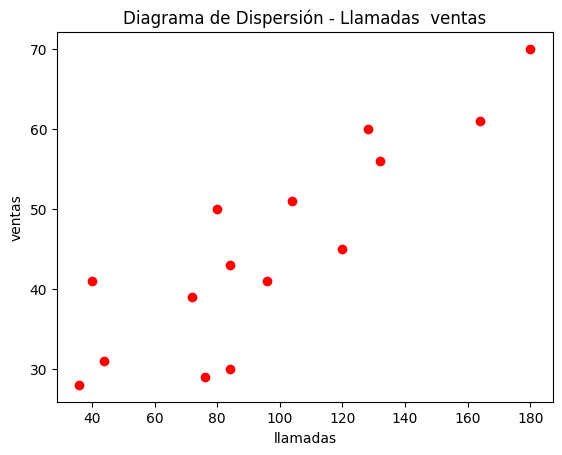

La covarianza es de :  [[1828.5714  476.5714]
 [ 476.5714  166.1429]]

La covarianza es  476.5714

La correlacion es:  0.8646
La correlacion es:  0.8646
Correlación positiva considerable


In [104]:
# Definir los datos
llamadas = np.array([96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84])
ventas = np.array([41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30])


# Crear un DataFrame de datos bivariados
datos = pd.DataFrame({'llamadas': llamadas, 'ventas': ventas})
print (datos)
f_dispersión(datos, "Llamadas  ventas")
print ("La covarianza es de : ", np.round(f_covarianza_1(datos), 4))
print()
print("La covarianza es ", np.round(f_covarianza_2(datos), 4))
print ()
print ("La correlacion es: ", np.round(f_correlacion_1(datos), 4))
print ("La correlacion es: ", np.round(f_correlacion_2(datos), 4))
print (f_interpretar_correlacion(f_correlacion_2(datos)))

## Cargar datos

Solo se describen las columnas 1 y 2 de los datos. La estatura de una presona va asociada con el peso corporal.

    obs  estaturas  pesos
0     1        178     79
1     2        172     75
2     3        160     62
3     4        192    107
4     5        167     72
5     6        170     52
6     7        185     90
7     8        175     70
8     9        180     85
9    10        170     92
10   11        180     87
11   12        180     82
12   13        170     75
13   14        183     90
14   15        161     65
15   16        150     56
16   17        162     56
17   18        177     82
18   19        190     95
19   20        165     70
20   21        164     80
21   22        183     92
22   23        175     74
23   24        168     65
24   25        170     77
25   26        175     72
26   27        175     65
27   28        178     70
28   29        170     75
29   30        160     65
30   31        162     60
31   32        166     67
32   33        178     75
33   34        170     70
34   35        163     60
35   36        165     72
36   37        170     76
37   38     

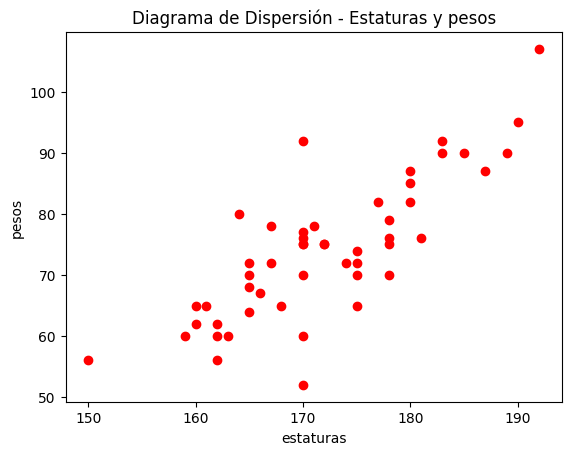

Correlación positiva considerable


In [108]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/estaturas_pesos.csv")
datos.iloc[:, [1, 2]].describe()
print (datos)
print ("La covarianza es de : ", np.round(f_covarianza_1(datos.iloc[:, [1, 2]]), 4))
print()
print("La covarianza es ", np.round(f_covarianza_2(datos.iloc[:, [1, 2]]), 4))
print ()
print ("La correlacion es: ", np.round(f_correlacion_1(datos.iloc[:, [1, 2]]), 4))
print ("La correlacion es: ", np.round(f_correlacion_2(datos.iloc[:, [1, 2]]), 4))
print ()
f_dispersión(datos.iloc[:, [1, 2]], "Estaturas y pesos")
print (f_interpretar_correlacion(f_correlacion_2(datos.iloc[:, [1, 2]])))


## Cargar datos de años y sueldos de personas

Suele pensarse que entre mas años de experiencia tiene una persona mas salario o ingreso económico tiene.


     years_experience     salary
0                4.60   66228.63
1                6.05   82864.99
2                9.57  115587.22
3                6.37   86050.69
4                2.82   55510.70
..                ...        ...
495              3.43   59651.48
496             10.26  120788.10
497              3.79   61684.19
498              3.24   58560.85
499              2.06   44332.17

[500 rows x 2 columns]
La covarianza es de :  [[8.23840000e+00 7.42809551e+04]
 [7.42809551e+04 6.72543406e+08]]

La covarianza es  74280.9551

La correlacion es:  0.9979
La correlacion es:  0.9979

Correlación positiva muy fuerte


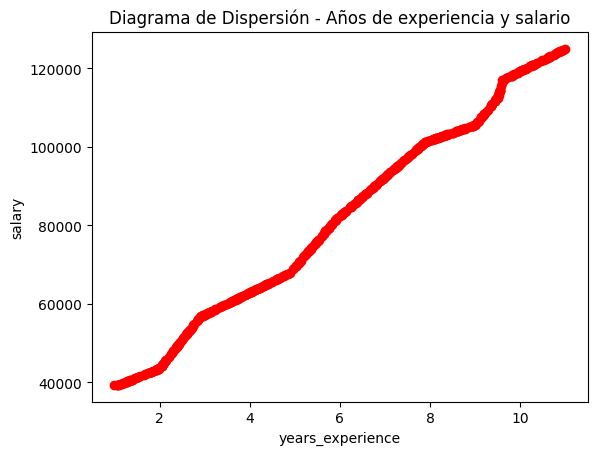

In [107]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/agnios_ingresos.csv")
datos = np.round(datos, 2)
datos.describe()
print (datos)
print ("La covarianza es de : ", np.round(f_covarianza_1(datos), 4))
print()
print("La covarianza es ", np.round(f_covarianza_2(datos), 4))
print ()
print ("La correlacion es: ", np.round(f_correlacion_1(datos), 4))
print ("La correlacion es: ", np.round(f_correlacion_2(datos), 4))
print ()
print (f_interpretar_correlacion(f_correlacion_2(datos)))


f_dispersión(datos, "Años de experiencia y salario")



# Interpretación

* ¿Cómo se interpreta un diagrama de dispersion de dos variables numéricas?
* ¿Cómo se interpreta el valor de a covarianza?
* ¿Cómo se intreprta el valor de la correlación de Pearson?

La covarianza y la correlación son medidas estadísticas que se deben interprear como el grado de relación que existe entre dos variables numéricas.

* El primer conjunto de datos de llamadas y ventas tienen una correlación positiva considerable.
* El segundo conjunto de datos de pesos y estaturas tienen una correlacion positiva considerable.
* El tercer conjunto de datos de años de experiencia y salario tienen una correlación positiva muy fuerte.

# Bibliografía

* Aldás, J., & Uriel, E. (2022). Análisis multivariante aplicado con R. Estadístico E books & Papers. Edicions Parainfo. Alfa Centauro.

* Anderson, D., Sweeney, D., & Williams, T. (2008). Estadística para administración y economía Estadística para administración y economía. 10a. Edición. México, D.F: Cengage Learning Editores,S.A. de C.V.

* chat openai. (25 de 08 de 2023). Chat Open AI. Obtenido de Chat Open AI: https://chat.openai.com/c/2f7311a3-d0db-45f3-acf8-f9be844afcfa
Cristian. (10 de 2018). Definición de Distribución bidimensional. Obtenido de Definición de Distribución bidimensional: https://definicionesdepalabras.com/distribucion-bidimensional/

* gadget-info.com. (2019). Diferencia entre covarianza y correlación. Obtenido de Diferencia entre covarianza y correlación: https://es.gadget-info.com/difference-between-covariance
Hernández, R., Fernández, C., & Baptista, M. d. (2014). Metodología de la Investigación. México: McGRAW-HILL / INTERAMERICANA EDITORES, S.A. DE C.V.

* Hernández, R., Fernández, C., & Baptista, M. d. (2014). Metodología de la Investigación. México: McGRAW-HILL / INTERAMERICANA EDITORES, S.A. DE C.V.

* Langa, B. (2018). Creación de modelos de negocios de éxito basados en la inteligencia artificial.
* Lind, D. A., Marchal, W. G., & Wathen, S. A. (2015). Estadística aplicada a los Negocios y a la Economía. México, D.F: McGrawn Hill Education. McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V.

